# Eksploracyjna Analiza Danych (EDA) Czerwonego Wina

Analiza danych o czerwonym winie zawiera następujące elementy:

## Wczytanie Danych
Dane zostały wczytane z pliku 'red_wine.csv' z użyciem separatora ';' i konwersją kropki dziesiętnej na przecinek.


In [1]:
import pandas as pd

# Wczytywanie danych z pliku CSV
file_path = 'red_wine.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')
df.head()


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


## Ocena Jakości Danych
Sprawdzono podstawowe statystyki danych oraz brakujące dane.


In [2]:
# Sprawdzenie podstawowych statystyk danych
df_description = df.describe()

# Sprawdzenie brakujących danych
missing_data = df.isnull().sum()

df_description, missing_data


(       fixedacidity  volatileacidity   citricacid  residualsugar    chlorides  \
 count   1508.000000      1508.000000  1508.000000    1508.000000  1508.000000   
 mean       8.315849         0.528670     0.271459       2.540617     0.087404   
 std        1.743581         0.179462     0.194416       1.429019     0.046516   
 min        4.600000         0.120000     0.000000       0.900000     0.012000   
 25%        7.100000         0.390000     0.100000       1.900000     0.070000   
 50%        7.900000         0.520000     0.260000       2.200000     0.079000   
 75%        9.200000         0.640000     0.420000       2.600000     0.090000   
 max       15.900000         1.580000     1.000000      15.500000     0.611000   
 
        freesulfurdioxide  totalsulfurdioxide      density           pH  \
 count        1508.000000         1508.000000  1508.000000  1508.000000   
 mean           15.894894           46.480769     0.996749     3.311379   
 std            10.412657          

## Podział Danych na Zbiór Uczący i Testowy
Dane zostały podzielone na zbiór uczący i testowy, z ziarnem generatora liczb losowych ustawionym na 308303.


In [3]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór uczący i testowy
train_data, test_data = train_test_split(df, test_size=0.2, random_state=308303)
train_data.shape, test_data.shape


((1206, 12), (302, 12))

## Eksploracyjna Analiza Danych (EDA) dla Zbioru Uczącego
Analiza obejmuje rozkład oceny jakości wina i macierz korelacji między zmiennymi.


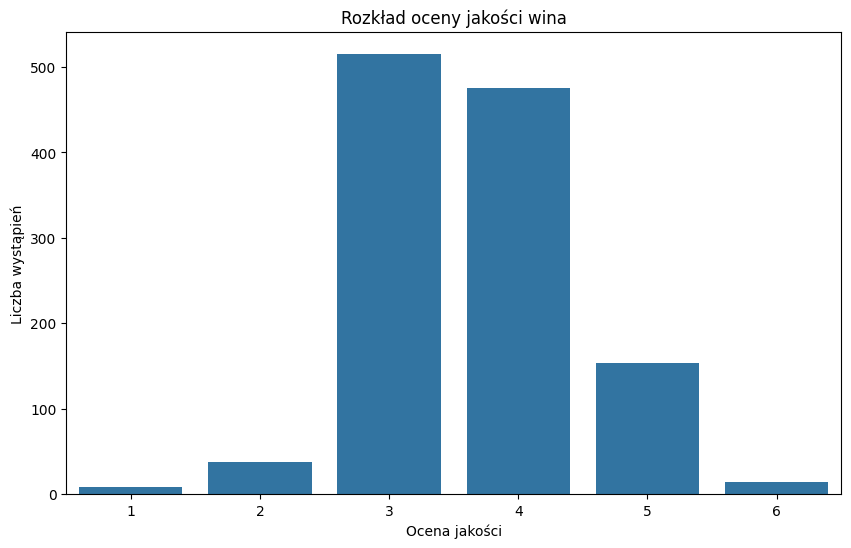

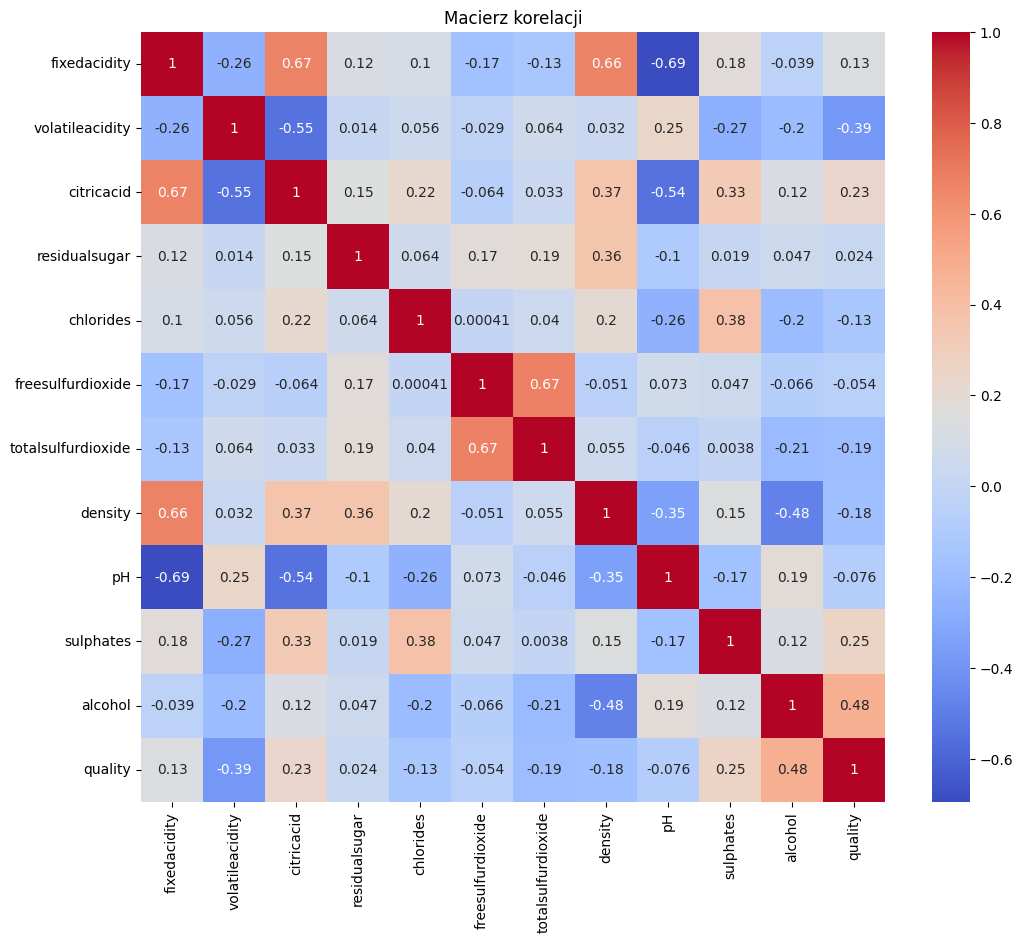

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analiza rozkładu zmiennej celu - jakości wina
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=train_data)
plt.title('Rozkład oceny jakości wina')
plt.xlabel('Ocena jakości')
plt.ylabel('Liczba wystąpień')
plt.show()

# Korelacje między zmiennymi
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()
